# 2025년 관세청 공공데이터 활용 경진대회
## **:딥러닝 기반 자동 밀수입 의심 거래 탐지 시스템**

OB 3조

공모전 공고:

https://www.customs.go.kr/kcs/na/ntt/selectNttInfo.do?mi=2889&bbsId=1341&nttSn=10134954&nttSnUrl=b572405a9436c68ca4f3b14434f4edd4#viewer

조별 활동 노션 링크:

https://www.notion.so/2025-21b60d13a6b7802b9716e2221dcde503?p=21b60d13a6b780faa1dffec258a55236&pm=s


## 1. 데이터 병합
### 1-1. 한글 폰트 다운

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
# !sudo apt-get install fonts-nanum

### 1-2. 패키지 import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

### 1-3. 데이터 불러오기

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
import_cost=pd.read_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/import_cost.csv', encoding='utf-8') # 운송비 데이터
df_1=pd.read_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/해양수산부_수출입현황_모음집/df_20.csv', encoding='utf-8') # 수출입 데이터
df_2=pd.read_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/해양수산부_수출입현황_모음집/df_21.csv', encoding='utf-8')
df_3=pd.read_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/해양수산부_수출입현황_모음집/df_21-22.csv', encoding='utf-8')
df_4=pd.read_excel('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/해양수산부_수출입현황_모음집/df_22-23.xlsx')
df_5=pd.read_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/해양수산부_수출입현황_모음집/df_23-24.csv', encoding='utf-8')
df_6=pd.read_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/해양수산부_수출입현황_모음집/df_24-25.csv', encoding='utf-8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import_cost.head()

,기간,미국서부,미국동부,유럽연합,중국,일본,베트남
0,2019-01,2065,1830,1136,712,769,423
1,2019-02,1636,1850,1164,690,762,427
2,2019-03,1692,1491,1142,680,892,429
3,2019-04,1758,1815,1369,662,797,441
4,2019-05,2552,1620,1429,692,901,404


In [ ]:
import_cost.tail()

,기간,미국서부,미국동부,유럽연합,중국,일본,베트남
72,2025-01,2655,1998,1507,1300,1110,1361
73,2025-02,3505,1831,1420,1274,1077,1322
74,2025-03,2758,1844,1264,1256,1086,1280
75,2025-04,2918,1630,1063,1253,1187,1220
76,2025-05,2639,1767,1120,1185,1046,1154


In [ ]:
df_1.head()

,기준년월,국가코드,HSK품목코드,수출입구분코드,수출입구분명,국가명,경제권명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),데이터기준일자
0,2020-01,AE,301998000,E,수출,아랍에미리트연합,걸프협력회의,넙치(활어),392,8670,392,8670,2020-01-31
1,2020-01,AE,302290000,E,수출,아랍에미리트연합,걸프협력회의,"기타 넙치류(간장, 어란제외/신선, 냉장/피레트, 어육제외)",3,84,3,84,2020-01-31
2,2020-01,AE,302899090,E,수출,아랍에미리트연합,걸프협력회의,"기타(신선 또는 냉장)(삼치,복어,병어,아귀 외 기타)",35,1197,35,1197,2020-01-31
3,2020-01,AE,306339000,E,수출,아랍에미리트연합,걸프협력회의,게(기타),232,14184,232,14184,2020-01-31
4,2020-01,AE,307119000,E,수출,아랍에미리트연합,걸프협력회의,굴치패 기타(산 것 신선 또는 냉장한 것),3,49,3,49,2020-01-31


In [ ]:
# 리스트에 담아서 concat으로 수직 결합 (row-wise)
df_all = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6], ignore_index=True)

df_all.head()

,기준년월,국가코드,HSK품목코드,수출입구분코드,수출입구분명,국가명,경제권명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),데이터기준일자,파일기준년월
0,2020-01,AE,301998000,E,수출,아랍에미리트연합,걸프협력회의,넙치(활어),392,8670,392,8670,2020-01-31,NaT
1,2020-01,AE,302290000,E,수출,아랍에미리트연합,걸프협력회의,"기타 넙치류(간장, 어란제외/신선, 냉장/피레트, 어육제외)",3,84,3,84,2020-01-31,NaT
2,2020-01,AE,302899090,E,수출,아랍에미리트연합,걸프협력회의,"기타(신선 또는 냉장)(삼치,복어,병어,아귀 외 기타)",35,1197,35,1197,2020-01-31,NaT
3,2020-01,AE,306339000,E,수출,아랍에미리트연합,걸프협력회의,게(기타),232,14184,232,14184,2020-01-31,NaT
4,2020-01,AE,307119000,E,수출,아랍에미리트연합,걸프협력회의,굴치패 기타(산 것 신선 또는 냉장한 것),3,49,3,49,2020-01-31,NaT


In [ ]:
df_all.tail()

,기준년월,국가코드,HSK품목코드,수출입구분코드,수출입구분명,국가명,경제권명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),데이터기준일자,파일기준년월
333053,2025-04,ZA,1604131000,I,수입,남아프리카,NaN,정어리(밀폐용기에넣은것),0,0,3,19,2025-04-30,NaT
333054,2025-04,ZA,2301209000,I,수입,남아프리카,NaN,어류외기타 분.조분 및 펠리트,0,0,0,11,2025-04-30,NaT
333055,2025-04,ZA,2501009010,I,수입,남아프리카,NaN,식염,1,8,1,8,2025-04-30,NaT
333056,2025-04,ZA,2501009090,I,수입,남아프리카,NaN,"기타소금,해수",0,1,2,30,2025-04-30,NaT
333057,2025-04,ZZ,7116102000,E,수출,기타국,NaN,양식진주로 만든 것,0,0,13,9999,2025-04-30,NaT


In [ ]:
import_cost.describe()

,미국서부,미국동부,유럽연합,중국,일본,베트남
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,2533.077922,2000.272727,1620.376623,1452.987013,1125.883117,1313.662338
std,530.867531,388.134731,391.295791,751.812345,250.712615,912.786806
min,1548.000000,1308.000000,902.000000,630.000000,712.000000,394.000000
25%,2106.000000,1714.000000,1303.000000,747.000000,905.000000,525.000000
50%,2554.000000,1887.000000,1502.000000,1217.000000,1111.000000,1105.000000
75%,2828.000000,2245.000000,1988.000000,2041.000000,1300.000000,1775.000000
max,3832.000000,3128.000000,2343.000000,2975.000000,1723.000000,3277.000000


In [ ]:
import_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      77 non-null     object
 1   미국서부    77 non-null     int64 
 2   미국동부    77 non-null     int64 
 3   유럽연합    77 non-null     int64 
 4   중국      77 non-null     int64 
 5   일본      77 non-null     int64 
 6   베트남     77 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.3+ KB


In [ ]:
df_all.describe()

,HSK품목코드,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),파일기준년월
count,3.330580e+05,3.330580e+05,3.330580e+05,3.330580e+05,3.330580e+05,63026
mean,1.065987e+09,1.121364e+05,1.459588e+05,6.817081e+05,8.966752e+05,2025-08-01 23:34:13.666740992
min,1.061210e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2025-01-23 00:00:00
25%,3.048790e+08,0.000000e+00,0.000000e+00,4.100000e+01,6.790000e+02,2025-05-23 00:00:00
50%,3.082100e+08,0.000000e+00,6.000000e+00,7.200000e+02,8.610000e+03,2025-08-22 00:00:00
75%,1.604204e+09,8.630000e+02,9.525500e+03,1.776200e+04,1.062708e+05,2025-10-22 00:00:00
max,9.606291e+09,3.360720e+08,7.032668e+07,2.726910e+09,3.437604e+08,2025-12-22 00:00:00
std,1.222527e+09,3.508659e+06,9.942127e+05,2.269955e+07,6.311665e+06,NaN


중량이 0인 것은 확인해볼 필요가 있음.

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333058 entries, 0 to 333057
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   기준년월             333058 non-null  object        
 1   국가코드             332762 non-null  object        
 2   HSK품목코드          333058 non-null  int64         
 3   수출입구분코드          333058 non-null  object        
 4   수출입구분명           333058 non-null  object        
 5   국가명              333058 non-null  object        
 6   경제권명             283415 non-null  object        
 7   수산물수출입품목명        333058 non-null  object        
 8   당월수출입중량(킬로그램)    333058 non-null  int64         
 9   당월수출입미화금액(달러)    333058 non-null  int64         
 10  당해누계수출입중량(킬로그램)  333058 non-null  int64         
 11  당해누계수출입미화금액(달러)  333058 non-null  int64         
 12  데이터기준일자          333058 non-null  object        
 13  파일기준년월           63026 non-null   datetime64[ns]
dtypes: datetime64[ns](1)

국가 코드, 경제권명, 파일기준년월이 없는 데이터가 있다.

### 1-4. 데이터 상세

In [ ]:
# 각 칼럼에 어떤 값이 있는지 확인
print("[기준년월] 값들:")
print(df_all['기준년월'].unique())

print(" [데이터기준일자] 값들:")
print(df_all['데이터기준일자'].unique())

print("\n[국가명] 값들:")
print(df_all['국가명'].unique())

print("\n📦 [수출입구분코드] 값들:")
print(df_all['수출입구분코드'].unique())

print("\n📦 [수출입구분명] 값들:")
print(df_all['수출입구분명'].unique())

print("\n[경제권명] 값들:")
print(df_all['경제권명'].unique())

🕒 [기준년월] 값들:
['2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06' '2020-07'
 '2020-08' '2020-09' '2020-10' '2020-11' '2020-12' '2021-01' '2021-02'
 '2021-03' '2021-04' '2021-05' '2021-06' '2021-07' '2021-08' '2021-09'
 '2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' Timestamp('2022-09-01 00:00:00')
 Timestamp('2022-10-01 00:00:00') Timestamp('2022-11-01 00:00:00')
 Timestamp('2022-12-01 00:00:00') Timestamp('2023-01-01 00:00:00')
 Timestamp('2023-02-01 00:00:00') Timestamp('2023-03-01 00:00:00')
 Timestamp('2023-04-01 00:00:00') Timestamp('2023-05-01 00:00:00')
 Timestamp('2022-08-01 00:00:00') Timestamp('2022-07-01 00:00:00')
 Timestamp('2022-06-01 00:00:00') '2023-06' '2023-07' '2023-08' '2023-09'
 '2023-10' '2023-11' '2023-12' '2024-01' '2024-02' '2024-03' '2024-04'
 '2024-05' '2024-06' '2024-07' '2024-08' '2024-09' '2024-10' '2024-11'
 '2024-12' '2025-01' '2025-02' '2025-03' '2025-04']
🕒 [데이터기준일자] 값들:
['2020-01-31' '2020-02-29' '2020-03-31' 

df_all 데이터에서 import_cost의 국가에 해당하는 수입품만 추출한다.

### 1-5. 데이터 병합

- 문제점 1. df_all의 유럽 국가들은 import_cost에서 전부 유럽으로 간주된다는 점.

In [ ]:
# 1. 국가 → 지역 매핑
country_to_region = {
    '그리스': '유럽연합',
    '네덜란드': '유럽연합',
    '덴마크': '유럽연합',
    '독일': '유럽연합',
    '라트비아': '유럽연합',
    '루마니아': '유럽연합',
    '몰타': '유럽연합',
    '벨기에': '유럽연합',
    '불가리아': '유럽연합',
    '스페인': '유럽연합',
    '아일랜드': '유럽연합',
    '에스토니아': '유럽연합',
    '이탈리아': '유럽연합',
    '체코공화국': '유럽연합',
    '크로아티아': '유럽연합',
    '포루투갈': '유럽연합',
    '폴란드': '유럽연합',
    '프랑스': '유럽연합',
    '스웨덴': '유럽연합',
    '슬로바키아': '유럽연합',
    '오스트리아': '유럽연합',
    '핀란드': '유럽연합',
    '리투아니아': '유럽연합',
    '슬로베니아': '유럽연합',
    '헝가리': '유럽연합',
    '미국': '미국',
    '베트남': '베트남',
    '일본': '일본',
    '중국': '중국'
}

# 2. df_2에 지역 컬럼 추가
df_all['지역'] = df_all['국가명'].map(country_to_region)

In [ ]:
# 확인
df_all['지역'].unique()

array([nan, '유럽연합', '중국', '일본', '미국', '베트남'], dtype=object)

해당하는 국가만 추출.

In [ ]:
df_filtered = df_all[
    (df_all['수출입구분명'] == '수입') &
    (df_all['국가명'].isin(country_to_region.keys()))
]

In [ ]:
print("\n🌍 [국가명] 값들:")
print(df_filtered['국가명'].unique())

print("\n📦 [수출입구분명] 값들:")
print(df_filtered['수출입구분명'].unique())


🌍 [국가명] 값들:
['오스트리아' '불가리아' '중국' '체코공화국' '독일' '에스토니아' '스페인' '핀란드' '프랑스' '그리스' '크로아티아'
 '헝가리' '아일랜드' '이탈리아' '일본' '몰타' '네덜란드' '폴란드' '루마니아' '스웨덴' '미국' '베트남' '벨기에'
 '리투아니아' '라트비아' '슬로베니아' '슬로바키아']

📦 [수출입구분명] 값들:
['수입']


- 문제점 2. import_cost에서 미국 서부와 미국 동부는 df_all에서 전부 미국으로 간주된다는 점.

미국 서부와 동부는 국가는 같으므로 거리에 다른 운송 비용 외에는 적용되지 않을 것이라 간주, 둘의 중간 지점을 미국 전체의 운송비용이라고 간주한다.

In [ ]:
import_cost['미국'] = (import_cost['미국서부'] + import_cost['미국동부']) / 2

In [ ]:
# 확인
import_cost.head()

,기간,미국서부,미국동부,유럽연합,중국,일본,베트남,미국
0,2019-01,2065,1830,1136,712,769,423,1947.5
1,2019-02,1636,1850,1164,690,762,427,1743.0
2,2019-03,1692,1491,1142,680,892,429,1591.5
3,2019-04,1758,1815,1369,662,797,441,1786.5
4,2019-05,2552,1620,1429,692,901,404,2086.0


- 문제점 3. HSK 자릿수가 맞지 않는다.

In [ ]:
# 세 개 컬럼을 문자열로 변환하고 길이 측정
df_filtered['HSK품목코드_자리수'] = df_filtered['HSK품목코드'].astype(str).str.len()

# 고유 자릿수 확인
print("✅ df_filtered['HSK품목코드'] 자릿수 종류:", df_filtered['HSK품목코드_자리수'].unique())

✅ df_filtered['HSK품목코드'] 자릿수 종류: [10  9]


In [ ]:
df_filtered['HSK품목코드'] = df_filtered['HSK품목코드'].astype(str).str.zfill(10)

df_filtered['HSK품목코드'].astype(str).apply(len).unique()

array([10])

import_cost + df_filtered

In [ ]:
# 날짜 포맷 맞추기
import_cost['기간'] = pd.to_datetime(import_cost['기간'])
df_filtered['기준년월'] = pd.to_datetime(df_filtered['기준년월'])

# 운송비 데이터 long 형태로 melt
cost_long = import_cost.melt(id_vars='기간', var_name='지역', value_name='운송비')

# 병합
df_final = pd.merge(
    df_filtered,
    cost_long,
    left_on=['기준년월', '지역'],
    right_on=['기간', '지역'],
    how='inner'
)

In [ ]:
df_final.head()

,기준년월,국가코드,HSK품목코드,수출입구분코드,수출입구분명,국가명,경제권명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),데이터기준일자,파일기준년월,지역,HSK품목코드_자리수,기간,운송비
0,2020-01-01,AT,2501001020,I,수입,오스트리아,유럽연합/경제협력개발기구,천일염,1739,15767,1739,15767,2020-01-31,NaT,유럽연합,10,2020-01-01,1265.0
1,2020-01-01,AT,2501009010,I,수입,오스트리아,유럽연합/경제협력개발기구,식염,3350,2542,3350,2542,2020-01-31,NaT,유럽연합,10,2020-01-01,1265.0
2,2020-01-01,AT,2501009020,I,수입,오스트리아,유럽연합/경제협력개발기구,순염화나트륨,98000,29985,98000,29985,2020-01-31,NaT,유럽연합,10,2020-01-01,1265.0
3,2020-01-01,BG,1605592090,I,수입,불가리아,유럽연합,소라(조제 또는 저장처리)기타,3520,26240,3520,26240,2020-01-31,NaT,유럽연합,10,2020-01-01,1265.0
4,2020-01-01,BG,1605599090,I,수입,불가리아,유럽연합,연체동물 기타(조제 또는 저장처리)(기타),31140,345953,31140,345953,2020-01-31,NaT,유럽연합,10,2020-01-01,1265.0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64648 entries, 0 to 64647
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   기준년월             64648 non-null  datetime64[ns]
 1   국가코드             64648 non-null  object        
 2   HSK품목코드          64648 non-null  object        
 3   수출입구분코드          64648 non-null  object        
 4   수출입구분명           64648 non-null  object        
 5   국가명              64648 non-null  object        
 6   경제권명             64648 non-null  object        
 7   수산물수출입품목명        64648 non-null  object        
 8   당월수출입중량(킬로그램)    64648 non-null  int64         
 9   당월수출입미화금액(달러)    64648 non-null  int64         
 10  당해누계수출입중량(킬로그램)  64648 non-null  int64         
 11  당해누계수출입미화금액(달러)  64648 non-null  int64         
 12  데이터기준일자          64648 non-null  object        
 13  파일기준년월           12369 non-null  datetime64[ns]
 14  지역               64648 non-null  objec



---

### 1-6. 거시경제변수 결합
- 환율

In [ ]:
exchange_rate=pd.read_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/거시경제변수_데이터/환율.csv', encoding='cp949')

In [ ]:
exchange_rate.head()

,날짜,환율
0,May-20,"1,228.67"
1,Jun-20,"1,210.01"
2,Jul-20,"1,198.90"
3,Aug-20,"1,186.85"
4,Sep-20,"1,178.80"


In [ ]:
exchange_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      60 non-null     object
 1   환율      60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [ ]:
# 두 번째 데이터셋에서 날짜 형식 변경 (월-연도 -> 날짜 형식으로 변환)
exchange_rate['날짜'] = pd.to_datetime(exchange_rate['날짜'], format='%b-%y')  # 'May-20' 형태를 datetime으로 변환
exchange_rate['날짜'] = exchange_rate['날짜'].dt.to_period('M').dt.to_timestamp()  # 월 단위로 변환

# 첫 번째 데이터셋에서 기준년월을 연-월 형식으로 변환
df_final['기준년월_변환'] = pd.to_datetime(df_final['기준년월'])

df_ffinal = pd.merge(
    df_final,
    exchange_rate,
    left_on='기준년월',
    right_on='날짜',
    how='inner'
)

# 사용 끝난 중간 컬럼 제거
df_ffinal.drop(['기준년월_변환', '날짜'], axis=1, inplace=True)

# 열 이름 변경 (원자료 → 평균환율 등)
df_ffinal.rename(columns={'환율': '평균환율'}, inplace=True)

In [ ]:
df_ffinal.head()

,기준년월,국가코드,HSK품목코드,수출입구분코드,수출입구분명,국가명,경제권명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),데이터기준일자,파일기준년월,지역,HSK품목코드_자리수,기간,운송비,평균환율
0,2020-05-01,AT,1212211090,I,수입,오스트리아,유럽연합/경제협력개발기구,김(기타)(식용의 것),0,0,1,8,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67"
1,2020-05-01,AT,1604191090,I,수입,오스트리아,유럽연합/경제협력개발기구,"어류조제품(연어,청어,정어리,고등어 등 밀폐용기에넣은것)",0,0,3,73,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67"
2,2020-05-01,AT,2102204090,I,수입,오스트리아,유럽연합/경제협력개발기구,스리루리나 효모(기타),0,0,2,26,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67"
3,2020-05-01,AT,2501001010,I,수입,오스트리아,유럽연합/경제협력개발기구,암염(岩鹽),857,17882,857,17882,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67"
4,2020-05-01,AT,2501001020,I,수입,오스트리아,유럽연합/경제협력개발기구,천일염,1500,5679,5699,24589,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67"


In [ ]:
df_ffinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61879 entries, 0 to 61878
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   기준년월             61879 non-null  datetime64[ns]
 1   국가코드             61879 non-null  object        
 2   HSK품목코드          61879 non-null  object        
 3   수출입구분코드          61879 non-null  object        
 4   수출입구분명           61879 non-null  object        
 5   국가명              61879 non-null  object        
 6   경제권명             61879 non-null  object        
 7   수산물수출입품목명        61879 non-null  object        
 8   당월수출입중량(킬로그램)    61879 non-null  int64         
 9   당월수출입미화금액(달러)    61879 non-null  int64         
 10  당해누계수출입중량(킬로그램)  61879 non-null  int64         
 11  당해누계수출입미화금액(달러)  61879 non-null  int64         
 12  데이터기준일자          61879 non-null  object        
 13  파일기준년월           12369 non-null  datetime64[ns]
 14  지역               61879 non-null  objec

- 유가

In [ ]:
oil_price=pd.read_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/거시경제변수_데이터/국제유가.csv', encoding='utf-8')

In [ ]:
oil_price.head()

,﻿월,유종,Dubai,Brent,WTI,Oman
0,05월,NaN,30.47,32.41,28.53,30.75
1,06월,NaN,40.80,40.77,38.31,40.85
2,07월,NaN,43.30,43.22,40.77,43.41
3,08월,NaN,44.00,45.02,42.39,44.22
4,09월,NaN,41.51,41.87,39.63,41.58


In [ ]:
print(oil_price.columns)

Index(['﻿월', '유종', 'Dubai', 'Brent', 'WTI', 'Oman'], dtype='object')


In [ ]:
# 1. 컬럼 이름에서 BOM 제거
oil_price.columns = oil_price.columns.str.replace('\ufeff', '', regex=False)

# 2. '월' 컬럼의 문자열 전처리: 공백 제거 및 특수문자 제거
oil_price['월'] = oil_price['월'].astype(str).str.strip().str.replace('\u200b', '').str.replace('\xa0', '')

# 3. 연도 포함 여부 마스킹
mask_year = oil_price['월'].str.contains('년', na=False)

# 4. 연도, 월 추출
oil_price['연도'] = None
oil_price['월숫자'] = None

# 연도와 월 분리 추출 (연도 있는 행)
oil_price.loc[mask_year, '연도'] = oil_price.loc[mask_year, '월'].str.extract(r'(\d{2})년')[0]
oil_price.loc[mask_year, '월숫자'] = oil_price.loc[mask_year, '월'].str.extract(r'(\d{1,2})월')[0]

# 월만 있는 행에서 월숫자 추출
oil_price.loc[~mask_year, '월숫자'] = oil_price.loc[~mask_year, '월'].str.extract(r'(\d{1,2})월')[0]

# 5. 연도 결측값 forward fill
oil_price['연도'] = oil_price['연도'].ffill()

In [ ]:
oil_price.head(10)

,월,유종,Dubai,Brent,WTI,Oman,연도,월숫자
0,05월,NaN,30.47,32.41,28.53,30.75,None,05
1,06월,NaN,40.80,40.77,38.31,40.85,None,06
2,07월,NaN,43.30,43.22,40.77,43.41,None,07
3,08월,NaN,44.00,45.02,42.39,44.22,None,08
4,09월,NaN,41.51,41.87,39.63,41.58,None,09
5,10월,NaN,40.67,41.52,39.55,40.99,None,10
6,11월,NaN,43.42,43.98,41.35,43.75,None,11
7,12월,NaN,49.84,50.22,47.07,49.99,None,12
8,21년01월,NaN,54.82,55.32,52.10,54.83,21,01
9,02월,NaN,60.89,62.28,59.06,60.96,21,02


In [ ]:
# 연도 칼럼 앞 8개가 None이면 '20'으로 채우기
oil_price.loc[oil_price.index[:8], '연도'] = '20'

In [ ]:
oil_price.head(10)

,월,유종,Dubai,Brent,WTI,Oman,연도,월숫자
0,05월,NaN,30.47,32.41,28.53,30.75,20,05
1,06월,NaN,40.80,40.77,38.31,40.85,20,06
2,07월,NaN,43.30,43.22,40.77,43.41,20,07
3,08월,NaN,44.00,45.02,42.39,44.22,20,08
4,09월,NaN,41.51,41.87,39.63,41.58,20,09
5,10월,NaN,40.67,41.52,39.55,40.99,20,10
6,11월,NaN,43.42,43.98,41.35,43.75,20,11
7,12월,NaN,49.84,50.22,47.07,49.99,20,12
8,21년01월,NaN,54.82,55.32,52.10,54.83,21,01
9,02월,NaN,60.89,62.28,59.06,60.96,21,02


In [ ]:
# 6. 문자열 결합으로 '20XX' 만들기
oil_price['연도'] = '20' + oil_price['연도'].astype(str)

# 7. datetime 변환
oil_price['기준년월'] = pd.to_datetime(oil_price['연도'] + '-' + oil_price['월숫자'] + '-01')

# 8. 필요한 열 정리
oil_price = oil_price[['기준년월', 'Dubai']]

In [ ]:
oil_price.head()

,기준년월,Dubai
0,2020-05-01,30.47
1,2020-06-01,40.80
2,2020-07-01,43.30
3,2020-08-01,44.00
4,2020-09-01,41.51


In [ ]:
# 9. df_ffinal과 병합
df_ffinal = pd.merge(df_ffinal, oil_price[['기준년월', 'Dubai']], on='기준년월', how='inner')

In [ ]:
df_ffinal.rename(columns={'Dubai': '유가'}, inplace=True) # 이름 바꾸기

In [ ]:
df_ffinal.head(10)

,기준년월,국가코드,HSK품목코드,수출입구분코드,수출입구분명,국가명,경제권명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),데이터기준일자,파일기준년월,지역,HSK품목코드_자리수,기간,운송비,평균환율,유가
0,2020-05-01,AT,1212211090,I,수입,오스트리아,유럽연합/경제협력개발기구,김(기타)(식용의 것),0,0,1,8,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47
1,2020-05-01,AT,1604191090,I,수입,오스트리아,유럽연합/경제협력개발기구,"어류조제품(연어,청어,정어리,고등어 등 밀폐용기에넣은것)",0,0,3,73,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47
2,2020-05-01,AT,2102204090,I,수입,오스트리아,유럽연합/경제협력개발기구,스리루리나 효모(기타),0,0,2,26,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47
3,2020-05-01,AT,2501001010,I,수입,오스트리아,유럽연합/경제협력개발기구,암염(岩鹽),857,17882,857,17882,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47
4,2020-05-01,AT,2501001020,I,수입,오스트리아,유럽연합/경제협력개발기구,천일염,1500,5679,5699,24589,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47
5,2020-05-01,AT,2501009010,I,수입,오스트리아,유럽연합/경제협력개발기구,식염,22500,18087,46325,35928,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47
6,2020-05-01,AT,2501009020,I,수입,오스트리아,유럽연합/경제협력개발기구,순염화나트륨,196000,58477,735000,221773,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47
7,2020-05-01,AT,2501009090,I,수입,오스트리아,유럽연합/경제협력개발기구,"기타소금,해수",0,18,2,142,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47
8,2020-05-01,BE,1604310000,I,수입,벨기에,유럽연합/경제협력개발기구,캐비아,12,9793,37,30485,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47
9,2020-05-01,BE,2501001010,I,수입,벨기에,유럽연합/경제협력개발기구,암염(岩鹽),0,0,15,42,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47


- 소비자물가지수

In [ ]:
cpi=pd.read_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/거시경제변수_데이터/소비자물가지수_총지수.csv', encoding='cp949')

In [ ]:
cpi.head()

,시점,전국
0,2020.05,99.44
1,2020.06,99.71
2,2020.07,99.63
3,2020.08,100.19
4,2020.09,100.74


In [ ]:
# 1️⃣ 소비자물가지수 데이터 전처리
cpi['날짜'] = cpi['시점'].astype(str)
cpi['날짜'] = pd.to_datetime(cpi['날짜'].str.replace('.', '-') + '-01')
cpi = cpi.rename(columns={'전국': 'CPI'})[['날짜', 'CPI']]
cpi = cpi.rename(columns={'날짜': '기준년월'})  # df_ffinal 의 날짜 컬럼명에 맞추기

# 2️⃣ 병합
df_ffinal = pd.merge(df_ffinal, cpi, on='기준년월', how='inner')

In [ ]:
df_ffinal.head()

,기준년월,국가코드,HSK품목코드,수출입구분코드,수출입구분명,국가명,경제권명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),...,당해누계수출입미화금액(달러),데이터기준일자,파일기준년월,지역,HSK품목코드_자리수,기간,운송비,평균환율,유가,CPI
0,2020-05-01,AT,1212211090,I,수입,오스트리아,유럽연합/경제협력개발기구,김(기타)(식용의 것),0,0,...,8,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47,99.44
1,2020-05-01,AT,1604191090,I,수입,오스트리아,유럽연합/경제협력개발기구,"어류조제품(연어,청어,정어리,고등어 등 밀폐용기에넣은것)",0,0,...,73,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47,99.44
2,2020-05-01,AT,2102204090,I,수입,오스트리아,유럽연합/경제협력개발기구,스리루리나 효모(기타),0,0,...,26,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47,99.44
3,2020-05-01,AT,2501001010,I,수입,오스트리아,유럽연합/경제협력개발기구,암염(岩鹽),857,17882,...,17882,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47,99.44
4,2020-05-01,AT,2501001020,I,수입,오스트리아,유럽연합/경제협력개발기구,천일염,1500,5679,...,24589,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47,99.44


In [ ]:
df_ffinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58179 entries, 0 to 58178
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   기준년월             58179 non-null  datetime64[ns]
 1   국가코드             58179 non-null  object        
 2   HSK품목코드          58179 non-null  object        
 3   수출입구분코드          58179 non-null  object        
 4   수출입구분명           58179 non-null  object        
 5   국가명              58179 non-null  object        
 6   경제권명             58179 non-null  object        
 7   수산물수출입품목명        58179 non-null  object        
 8   당월수출입중량(킬로그램)    58179 non-null  int64         
 9   당월수출입미화금액(달러)    58179 non-null  int64         
 10  당해누계수출입중량(킬로그램)  58179 non-null  int64         
 11  당해누계수출입미화금액(달러)  58179 non-null  int64         
 12  데이터기준일자          58179 non-null  object        
 13  파일기준년월           11727 non-null  datetime64[ns]
 14  지역               58179 non-null  objec

- 생산자물가지수

In [ ]:
ppi=pd.read_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/거시경제변수_데이터/생산자물가지수_총지수.csv', encoding='cp949')

In [ ]:
ppi.head()

,시점,총지수
0,2020.05,98.96
1,2020.06,99.47
2,2020.07,99.69
3,2020.08,100.18
4,2020.09,100.38


In [ ]:
# 1️⃣ 소비자물가지수 데이터 전처리
ppi['날짜'] = ppi['시점'].astype(str)
ppi['날짜'] = pd.to_datetime(ppi['날짜'].str.replace('.', '-') + '-01')
ppi = ppi.rename(columns={'총지수': 'PPI'})[['날짜', 'PPI']]
ppi = ppi.rename(columns={'날짜': '기준년월'})  # df_ffinal 의 날짜 컬럼명에 맞추기

# 2️⃣ 병합
df_ffinal = pd.merge(df_ffinal, ppi, on='기준년월', how='inner')

In [ ]:
df_ffinal.head()

,기준년월,국가코드,HSK품목코드,수출입구분코드,수출입구분명,국가명,경제권명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),...,데이터기준일자,파일기준년월,지역,HSK품목코드_자리수,기간,운송비,평균환율,유가,CPI,PPI
0,2020-05-01,AT,1212211090,I,수입,오스트리아,유럽연합/경제협력개발기구,김(기타)(식용의 것),0,0,...,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47,99.44,98.96
1,2020-05-01,AT,1604191090,I,수입,오스트리아,유럽연합/경제협력개발기구,"어류조제품(연어,청어,정어리,고등어 등 밀폐용기에넣은것)",0,0,...,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47,99.44,98.96
2,2020-05-01,AT,2102204090,I,수입,오스트리아,유럽연합/경제협력개발기구,스리루리나 효모(기타),0,0,...,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47,99.44,98.96
3,2020-05-01,AT,2501001010,I,수입,오스트리아,유럽연합/경제협력개발기구,암염(岩鹽),857,17882,...,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47,99.44,98.96
4,2020-05-01,AT,2501001020,I,수입,오스트리아,유럽연합/경제협력개발기구,천일염,1500,5679,...,2020-05-31,NaT,유럽연합,10,2020-05-01,1442.0,"1,228.67",30.47,99.44,98.96


In [ ]:
df_ffinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62955 entries, 0 to 62954
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   기준년월             62955 non-null  datetime64[ns]
 1   국가코드             62955 non-null  object        
 2   HSK품목코드          62955 non-null  object        
 3   수출입구분코드          62955 non-null  object        
 4   수출입구분명           62955 non-null  object        
 5   국가명              62955 non-null  object        
 6   경제권명             62955 non-null  object        
 7   수산물수출입품목명        62955 non-null  object        
 8   당월수출입중량(킬로그램)    62955 non-null  int64         
 9   당월수출입미화금액(달러)    62955 non-null  int64         
 10  당해누계수출입중량(킬로그램)  62955 non-null  int64         
 11  당해누계수출입미화금액(달러)  62955 non-null  int64         
 12  데이터기준일자          62955 non-null  object        
 13  파일기준년월           12877 non-null  datetime64[ns]
 14  지역               62955 non-null  objec

병합 완료.



---

## 2. EDA
### 2-1. 중복 칼럼 제거

- 수출입구분코드, 수출입구분명 (→ 수입만)
- 국가코드 (→ 국가명 있음)
- 경제권명 (→ 지역 있음)
- 데이터기준일자 (→ 분석용으로 사용되지 않는 경우)
- 적용국가구분 (→ 2만 있음)

In [ ]:
df_ffinal = df_ffinal.drop(columns=[
    '수출입구분코드',
    '수출입구분명',
    '국가코드',
    '경제권명',
    '데이터기준일자',
    '파일기준년월',
    'HSK품목코드_자리수',
    '기간'
])

### 2-1. 결측치 확인

In [ ]:
# 각 컬럼의 결측치 개수 확인
print(df_ffinal.isnull().sum())

기준년월               0
HSK품목코드            0
국가명                0
수산물수출입품목명          0
당월수출입중량(킬로그램)      0
당월수출입미화금액(달러)      0
당해누계수출입중량(킬로그램)    0
당해누계수출입미화금액(달러)    0
지역                 0
운송비                0
평균환율               0
유가                 0
CPI                0
PPI                0
dtype: int64


In [ ]:
df_ffinal.head()

,기준년월,HSK품목코드,국가명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),지역,운송비,평균환율,유가,CPI,PPI
0,2020-05-01,1212211090,오스트리아,김(기타)(식용의 것),0,0,1,8,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96
1,2020-05-01,1604191090,오스트리아,"어류조제품(연어,청어,정어리,고등어 등 밀폐용기에넣은것)",0,0,3,73,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96
2,2020-05-01,2102204090,오스트리아,스리루리나 효모(기타),0,0,2,26,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96
3,2020-05-01,2501001010,오스트리아,암염(岩鹽),857,17882,857,17882,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96
4,2020-05-01,2501001020,오스트리아,천일염,1500,5679,5699,24589,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96


In [ ]:
df_ffinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62955 entries, 0 to 62954
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   기준년월             62955 non-null  datetime64[ns]
 1   HSK품목코드          62955 non-null  object        
 2   국가명              62955 non-null  object        
 3   수산물수출입품목명        62955 non-null  object        
 4   당월수출입중량(킬로그램)    62955 non-null  int64         
 5   당월수출입미화금액(달러)    62955 non-null  int64         
 6   당해누계수출입중량(킬로그램)  62955 non-null  int64         
 7   당해누계수출입미화금액(달러)  62955 non-null  int64         
 8   지역               62955 non-null  object        
 9   운송비              62955 non-null  float64       
 10  평균환율             62955 non-null  object        
 11  유가               62955 non-null  float64       
 12  CPI              62955 non-null  float64       
 13  PPI              62955 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int6

수량 단가 및 중량 단가... 0으로 처리

밀수입 탐지 등 이상탐지가 목적이므로 단가 기준이 있는 품목만 사용하는 것이 가장 안전할지도.

### 2-2. 데이터 시각화 및 분석
- 기간별 운송비 변동 분석

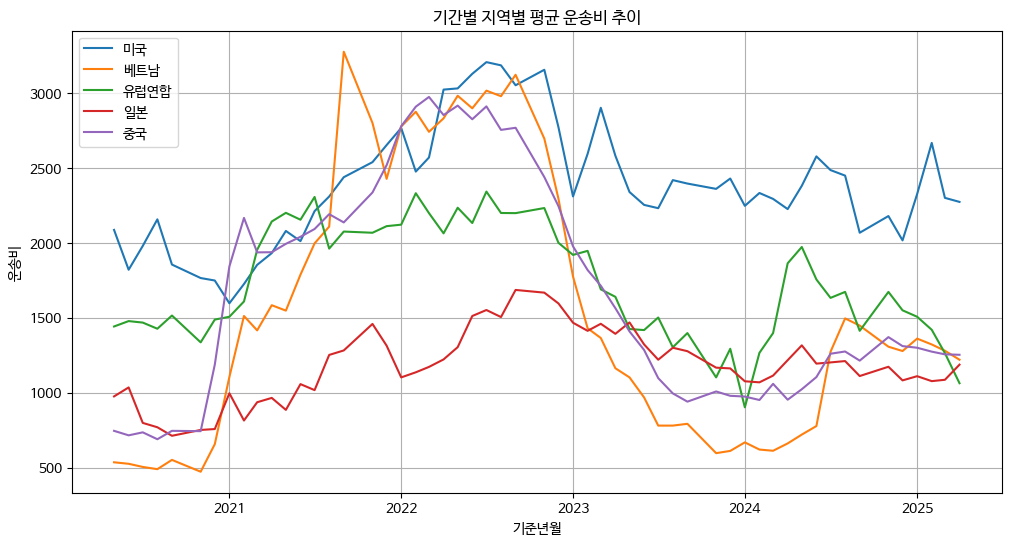

In [ ]:
import matplotlib.pyplot as plt

# 월별 지역별 평균 운송비
monthly_cost = df_ffinal[df_ffinal['운송비'].notnull()].groupby(['기준년월', '지역'])
['운송비'].mean().reset_index()

# 시각화
plt.figure(figsize=(12,6))
for region in monthly_cost['지역'].unique():
    subset = monthly_cost[monthly_cost['지역'] == region]
    plt.plot(subset['기준년월'], subset['운송비'], label=region)

plt.title("기간별 지역별 평균 운송비 추이")
plt.xlabel("기준년월")
plt.ylabel("운송비")
plt.legend()
plt.grid()
plt.show()

- 국가별 HS 코드 상위 품목 분석

In [ ]:
# 국가-HS코드별 수입 금액 합산
hs_imports = df_ffinal.groupby(['지역', '수산물수출입품목명'])
['당월수출입미화금액(달러)'].sum().reset_index()

# 상위 3개씩 추출
top_hs_by_country = (
    hs_imports
    .sort_values(['지역', '당월수출입미화금액(달러)'], ascending=[True, False])
    .groupby('지역')
    .head(3)
)

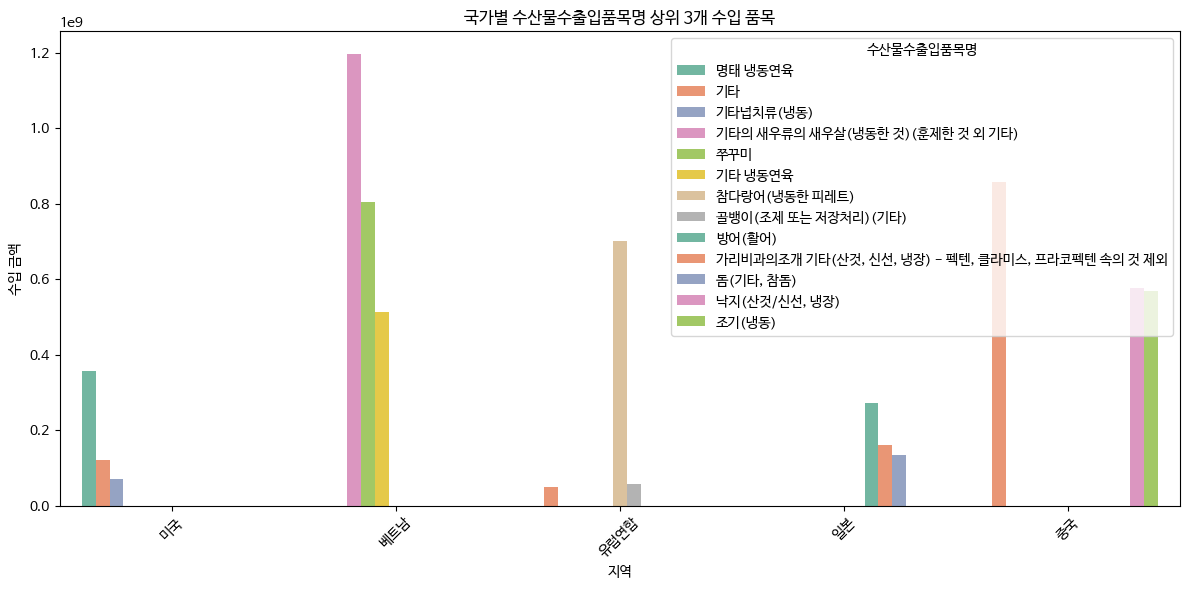

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_hs_by_country,
    x='지역',
    y='당월수출입미화금액(달러)',
    hue='수산물수출입품목명',
    palette='Set2'
)
plt.title("국가별 수산물수출입품목명 상위 3개 수입 품목")
plt.ylabel("수입 금액")
plt.xticks(rotation=45)
plt.legend(title="수산물수출입품목명")
plt.tight_layout()
plt.show()

- 품목별 수입 중량의 시간 추이 분석


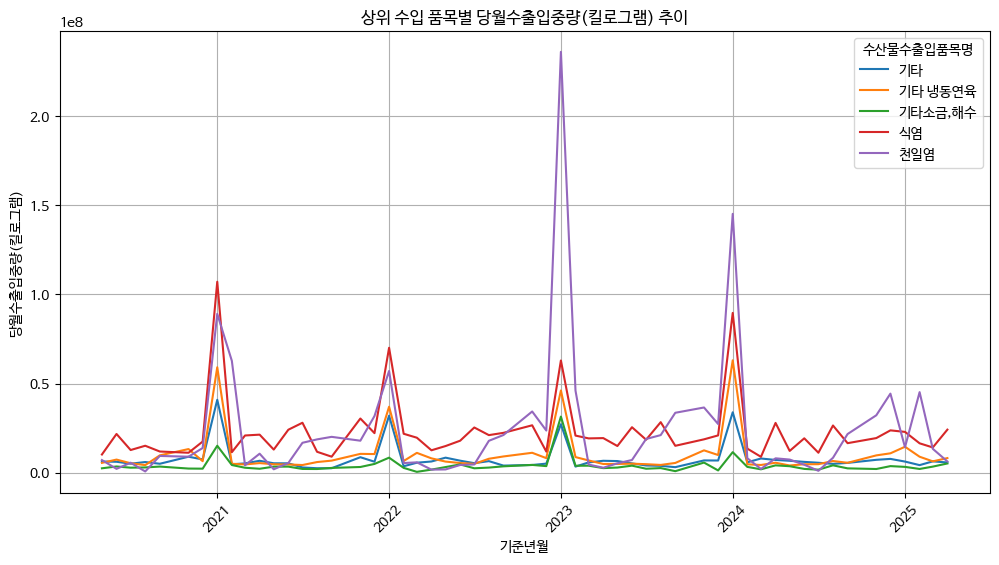

In [ ]:
# 가장 많이 수입된 품목 Top N개 선정
top_items = df_ffinal.groupby('수산물수출입품목명')['당월수출입중량(킬로그램)']
.sum().nlargest(5).index

# 기간별 품목별 당월수출입중량(킬로그램)
subset = df_ffinal[df_ffinal['수산물수출입품목명'].isin(top_items)]
monthly_item = subset.groupby(['기준년월', '수산물수출입품목명'])['당월수출입중량(킬로그램)']
.sum().reset_index()

# 시각화
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_item, x='기준년월', y='당월수출입중량(킬로그램)', hue='수산물수출입품목명')
plt.title("상위 수입 품목별 당월수출입중량(킬로그램) 추이")
plt.xticks(rotation=45)
plt.grid()
plt.show()

- 수입 상위 품목 Top 10 (금액 기준)

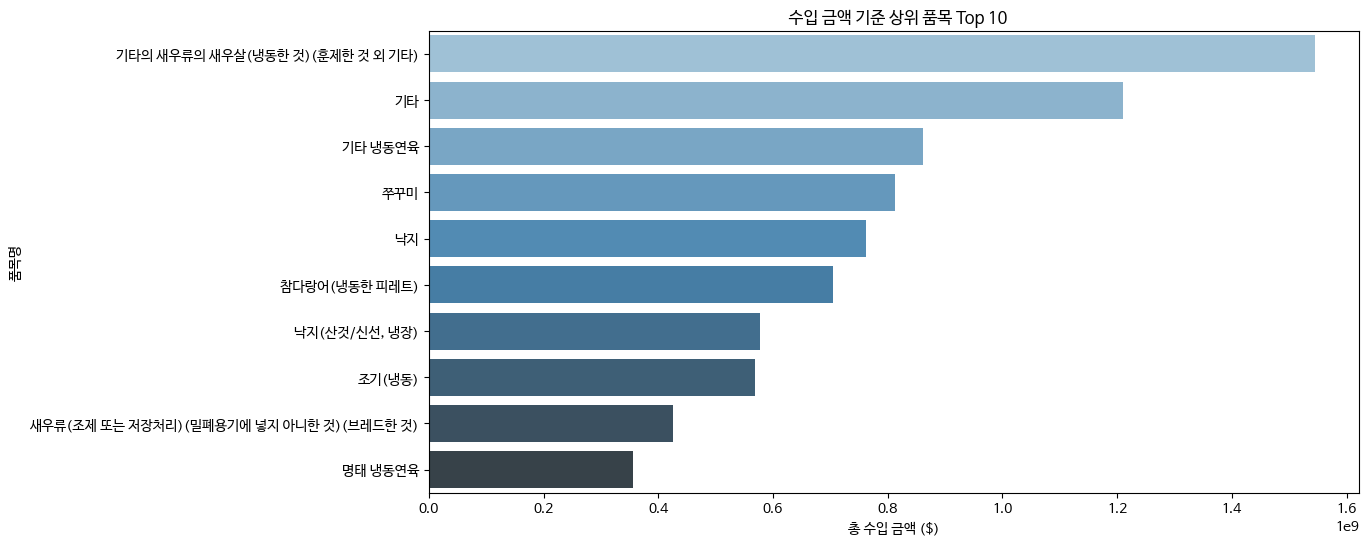

In [ ]:
top_products = df_ffinal.groupby('수산물수출입품목명')['당월수출입미화금액(달러)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_d')
plt.title('💰 수입 금액 기준 상위 품목 Top 10')
plt.xlabel('총 수입 금액 ($)')
plt.ylabel('품목명')
plt.show()

In [ ]:
df_ffinal.to_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/df_ffinal.csv', index=False)

print(f"✅ 저장 완료")

✅ 저장 완료


In [ ]:
df_ffinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62955 entries, 0 to 62954
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   기준년월             62955 non-null  datetime64[ns]
 1   HSK품목코드          62955 non-null  object        
 2   국가명              62955 non-null  object        
 3   수산물수출입품목명        62955 non-null  object        
 4   당월수출입중량(킬로그램)    62955 non-null  int64         
 5   당월수출입미화금액(달러)    62955 non-null  int64         
 6   당해누계수출입중량(킬로그램)  62955 non-null  int64         
 7   당해누계수출입미화금액(달러)  62955 non-null  int64         
 8   지역               62955 non-null  object        
 9   운송비              62955 non-null  float64       
 10  평균환율             62955 non-null  object        
 11  유가               62955 non-null  float64       
 12  CPI              62955 non-null  float64       
 13  PPI              62955 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int6

**수정할 부분 있는지 확인**

In [ ]:
df_ffinal['국가명'].unique()

array(['오스트리아', '벨기에', '불가리아', '중국', '체코공화국', '독일', '에스토니아', '스페인', '핀란드',
       '프랑스', '그리스', '크로아티아', '헝가리', '아일랜드', '이탈리아', '일본', '리투아니아',
       '라트비아', '몰타', '네덜란드', '폴란드', '루마니아', '스웨덴', '슬로베니아', '미국', '베트남',
       '슬로바키아'], dtype=object)

In [ ]:
df_ffinal['지역'].unique()

array(['유럽연합', '중국', '일본', '미국', '베트남'], dtype=object)

In [ ]:
df_ffinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62955 entries, 0 to 62954
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   기준년월             62955 non-null  datetime64[ns]
 1   HSK품목코드          62955 non-null  object        
 2   국가명              62955 non-null  object        
 3   수산물수출입품목명        62955 non-null  object        
 4   당월수출입중량(킬로그램)    62955 non-null  int64         
 5   당월수출입미화금액(달러)    62955 non-null  int64         
 6   당해누계수출입중량(킬로그램)  62955 non-null  int64         
 7   당해누계수출입미화금액(달러)  62955 non-null  int64         
 8   지역               62955 non-null  object        
 9   운송비              62955 non-null  float64       
 10  평균환율             62955 non-null  object        
 11  유가               62955 non-null  float64       
 12  CPI              62955 non-null  float64       
 13  PPI              62955 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int6



---


## 3. 모의데이터 제작


### 3-1. 실제단가 칼럼제작

In [ ]:
((df_ffinal['당월수출입중량(킬로그램)'] == 0) | (df_ffinal['당월수출입미화금액(달러)'] == 0)).sum()

np.int64(24725)

In [ ]:
df_ffinal['실제단가'] = df_ffinal.apply(
    lambda row: row['당월수출입미화금액(달러)'] / row['당월수출입중량(킬로그램)']
    if row['당월수출입중량(킬로그램)'] != 0 else 0,
    axis=1
)

In [ ]:
df_ffinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62955 entries, 0 to 62954
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   기준년월             62955 non-null  datetime64[ns]
 1   HSK품목코드          62955 non-null  object        
 2   국가명              62955 non-null  object        
 3   수산물수출입품목명        62955 non-null  object        
 4   당월수출입중량(킬로그램)    62955 non-null  int64         
 5   당월수출입미화금액(달러)    62955 non-null  int64         
 6   당해누계수출입중량(킬로그램)  62955 non-null  int64         
 7   당해누계수출입미화금액(달러)  62955 non-null  int64         
 8   지역               62955 non-null  object        
 9   운송비              62955 non-null  float64       
 10  평균환율             62955 non-null  object        
 11  유가               62955 non-null  float64       
 12  CPI              62955 non-null  float64       
 13  PPI              62955 non-null  float64       
 14  실제단가             62955 non-null  float

In [ ]:
df_ffinal.head()

,기준년월,HSK품목코드,국가명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),지역,운송비,평균환율,유가,CPI,PPI,실제단가
0,2020-05-01,1212211090,오스트리아,김(기타)(식용의 것),0,0,1,8,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96,0.000000
1,2020-05-01,1604191090,오스트리아,"어류조제품(연어,청어,정어리,고등어 등 밀폐용기에넣은것)",0,0,3,73,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96,0.000000
2,2020-05-01,2102204090,오스트리아,스리루리나 효모(기타),0,0,2,26,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96,0.000000
3,2020-05-01,2501001010,오스트리아,암염(岩鹽),857,17882,857,17882,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96,20.865811
4,2020-05-01,2501001020,오스트리아,천일염,1500,5679,5699,24589,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96,3.786000


### 3-2. 총 운송비 칼럼 제작

In [ ]:
# 1. kg당 운송비(원) 계산
df_ffinal['kg당 운송비(원)'] = df_ffinal['운송비'] * 1000 / 40000

# 2. 총 운송비(원) 계산 (중량이 0이면 0)
df_ffinal['총 운송비(원)'] = df_ffinal.apply(
    lambda row: 0 if row['당월수출입중량(킬로그램)'] == 0
    else row['당월수출입중량(킬로그램)'] * row['kg당 운송비(원)'], axis=1)

df_ffinal

,기준년월,HSK품목코드,국가명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),지역,운송비,평균환율,유가,CPI,PPI,실제단가,kg당 운송비(원),총 운송비(원)
0,2020-05-01,1212211090,오스트리아,김(기타)(식용의 것),0,0,1,8,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96,0.000000,36.05,0.00
1,2020-05-01,1604191090,오스트리아,"어류조제품(연어,청어,정어리,고등어 등 밀폐용기에넣은것)",0,0,3,73,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96,0.000000,36.05,0.00
2,2020-05-01,2102204090,오스트리아,스리루리나 효모(기타),0,0,2,26,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96,0.000000,36.05,0.00
3,2020-05-01,2501001010,오스트리아,암염(岩鹽),857,17882,857,17882,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96,20.865811,36.05,30894.85
4,2020-05-01,2501001020,오스트리아,천일염,1500,5679,5699,24589,유럽연합,1442.0,"1,228.67",30.47,99.44,98.96,3.786000,36.05,54075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,2025-04-01,2501009020,베트남,순염화나트륨,1026,6120,3149,18831,베트남,1220.0,"1,444.31",67.74,116.38,120.14,5.964912,30.50,31293.00
62951,2025-04-01,2501009090,베트남,"기타소금,해수",2162,17204,4567,44908,베트남,1220.0,"1,444.31",67.74,116.38,120.14,7.957447,30.50,65941.00
62952,2025-04-01,7116102000,베트남,양식진주로 만든 것,3,2115,3,2115,베트남,1220.0,"1,444.31",67.74,116.38,120.14,705.000000,30.50,91.50
62953,2025-04-01,9601901090,베트남,패각(기타),181769,44735,824881,285562,베트남,1220.0,"1,444.31",67.74,116.38,120.14,0.246109,30.50,5543954.50


In [ ]:
df_ffinal = df_ffinal.drop(columns=['운송비'])

In [ ]:
df_ffinal.to_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/df_ffinal.csv', index=False)

In [ ]:
df_ffinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62955 entries, 0 to 62954
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   기준년월             62955 non-null  datetime64[ns]
 1   HSK품목코드          62955 non-null  object        
 2   국가명              62955 non-null  object        
 3   수산물수출입품목명        62955 non-null  object        
 4   당월수출입중량(킬로그램)    62955 non-null  int64         
 5   당월수출입미화금액(달러)    62955 non-null  int64         
 6   당해누계수출입중량(킬로그램)  62955 non-null  int64         
 7   당해누계수출입미화금액(달러)  62955 non-null  int64         
 8   지역               62955 non-null  object        
 9   평균환율             62955 non-null  object        
 10  유가               62955 non-null  float64       
 11  CPI              62955 non-null  float64       
 12  PPI              62955 non-null  float64       
 13  실제단가             62955 non-null  float64       
 14  kg당 운송비(원)       62955 non-null  float

### 3-3. 이상치 데이터 생성

1년(24년 5월 ~ 25년 4월) 100개 생성

운송비 이상치 20개, 단가 이상치 80개

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/ESAA OB 3조/방학프로젝트/df_ffinal.csv')
data

Mounted at /content/drive


,기준년월,HSK품목코드,국가명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),지역,평균환율,유가,CPI,PPI,실제단가,kg당 운송비(원),총 운송비(원)
0,2020-05-01,1212211090,오스트리아,김(기타)(식용의 것),0,0,1,8,유럽연합,"1,228.67",30.47,99.44,98.96,0.000000,36.05,0.00
1,2020-05-01,1604191090,오스트리아,"어류조제품(연어,청어,정어리,고등어 등 밀폐용기에넣은것)",0,0,3,73,유럽연합,"1,228.67",30.47,99.44,98.96,0.000000,36.05,0.00
2,2020-05-01,2102204090,오스트리아,스리루리나 효모(기타),0,0,2,26,유럽연합,"1,228.67",30.47,99.44,98.96,0.000000,36.05,0.00
3,2020-05-01,2501001010,오스트리아,암염(岩鹽),857,17882,857,17882,유럽연합,"1,228.67",30.47,99.44,98.96,20.865811,36.05,30894.85
4,2020-05-01,2501001020,오스트리아,천일염,1500,5679,5699,24589,유럽연합,"1,228.67",30.47,99.44,98.96,3.786000,36.05,54075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,2025-04-01,2501009020,베트남,순염화나트륨,1026,6120,3149,18831,베트남,"1,444.31",67.74,116.38,120.14,5.964912,30.50,31293.00
62951,2025-04-01,2501009090,베트남,"기타소금,해수",2162,17204,4567,44908,베트남,"1,444.31",67.74,116.38,120.14,7.957447,30.50,65941.00
62952,2025-04-01,7116102000,베트남,양식진주로 만든 것,3,2115,3,2115,베트남,"1,444.31",67.74,116.38,120.14,705.000000,30.50,91.50
62953,2025-04-01,9601901090,베트남,패각(기타),181769,44735,824881,285562,베트남,"1,444.31",67.74,116.38,120.14,0.246109,30.50,5543954.50


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62955 entries, 0 to 62954
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준년월             62955 non-null  object 
 1   HSK품목코드          62955 non-null  int64  
 2   국가명              62955 non-null  object 
 3   수산물수출입품목명        62955 non-null  object 
 4   당월수출입중량(킬로그램)    62955 non-null  int64  
 5   당월수출입미화금액(달러)    62955 non-null  int64  
 6   당해누계수출입중량(킬로그램)  62955 non-null  int64  
 7   당해누계수출입미화금액(달러)  62955 non-null  int64  
 8   지역               62955 non-null  object 
 9   평균환율             62955 non-null  object 
 10  유가               62955 non-null  float64
 11  CPI              62955 non-null  float64
 12  PPI              62955 non-null  float64
 13  실제단가             62955 non-null  float64
 14  kg당 운송비(원)       62955 non-null  float64
 15  총 운송비(원)         62955 non-null  float64
dtypes: float64(6), int64(5), object(5)
memory usage: 7.7+ MB


- 평균 환율이 object 타입이라 float 형으로 변경함

In [ ]:
data['평균환율'] = data['평균환율'].str.replace(',', '').astype(float)

In [ ]:
data['기준년월'] = pd.to_datetime(data['기준년월'])

# 테스트 구간 필터링: 2024-05 ~ 2025-04
mask_test = (data['기준년월'] >= '2024-05-01') & (data['기준년월'] <= '2025-04-30')
test_data = data[mask_test].copy()

In [ ]:
test_data

,기준년월,HSK품목코드,국가명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),지역,평균환율,유가,CPI,PPI,실제단가,kg당 운송비(원),총 운송비(원)
51622,2024-05-01,106209000,오스트리아,기타 파충류,0,0,11,765,유럽연합,1365.39,84.04,114.10,119.25,0.000000,49.325,0.000000e+00
51623,2024-05-01,2501001010,오스트리아,암염(岩鹽),0,0,101,9552,유럽연합,1365.39,84.04,114.10,119.25,0.000000,49.325,0.000000e+00
51624,2024-05-01,2501009010,오스트리아,식염,25000,29044,73000,83317,유럽연합,1365.39,84.04,114.10,119.25,1.161760,49.325,1.233125e+06
51625,2024-05-01,2501009020,오스트리아,순염화나트륨,1136000,350786,2696025,843935,유럽연합,1365.39,84.04,114.10,119.25,0.308790,49.325,5.603320e+07
51626,2024-05-01,2501009090,오스트리아,"기타소금,해수",35691,55745,114861,171732,유럽연합,1365.39,84.04,114.10,119.25,1.561878,49.325,1.760459e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,2025-04-01,2501009020,베트남,순염화나트륨,1026,6120,3149,18831,베트남,1444.31,67.74,116.38,120.14,5.964912,30.500,3.129300e+04
62951,2025-04-01,2501009090,베트남,"기타소금,해수",2162,17204,4567,44908,베트남,1444.31,67.74,116.38,120.14,7.957447,30.500,6.594100e+04
62952,2025-04-01,7116102000,베트남,양식진주로 만든 것,3,2115,3,2115,베트남,1444.31,67.74,116.38,120.14,705.000000,30.500,9.150000e+01
62953,2025-04-01,9601901090,베트남,패각(기타),181769,44735,824881,285562,베트남,1444.31,67.74,116.38,120.14,0.246109,30.500,5.543954e+06


#### A. 운송비 이상치

In [ ]:
# 랜덤하게 20건 추출
outlier_samples = test_data.sample(n=20, random_state=42).copy()

In [ ]:
outlier_samples

,기준년월,HSK품목코드,국가명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),지역,평균환율,유가,CPI,PPI,실제단가,kg당 운송비(원),총 운송비(원)
58660,2024-12-01,305531000,중국,기타 어류(건조),88054,827945,1105319,10706465,중국,1434.42,73.23,114.91,119.52,9.402696,32.7750,2.885970e+06
61093,2025-02-01,305720000,베트남,"대구(가두스모르화), 대구 이외",21546,60521,42769,120187,베트남,1445.56,77.92,116.08,120.33,2.808920,33.0500,7.120953e+05
62065,2025-04-01,302820000,중국,가오리와 홍어(라지대과)(신선 또는 냉장),15560,54617,74460,300261,중국,1444.31,67.74,116.38,120.14,3.510090,31.3250,4.874170e+05
53746,2024-07-01,2501009010,오스트리아,식염,20000,22438,103005,116995,유럽연합,1383.38,83.83,114.13,119.56,1.121900,40.8250,8.165000e+05
60960,2025-02-01,1604129000,스웨덴,청어(통조림외조제품),1758,14733,1758,14733,유럽연합,1445.56,77.92,116.08,120.33,8.380546,35.5000,6.240900e+04
59539,2024-12-01,307229000,미국,가리비과의조개(냉동),1045,40233,39135,956320,미국,1434.42,73.23,114.91,119.52,38.500478,50.4250,5.269412e+04
55265,2024-08-01,511996000,스페인,동물성의해면,0,0,5,842,유럽연합,1354.15,77.60,114.54,119.38,0.000000,41.8250,0.000000e+00
53224,2024-06-01,306959020,일본,건조한 것,0,0,0,3,일본,1380.13,82.56,113.84,119.23,0.000000,29.8500,0.000000e+00
62531,2025-04-01,306141090,일본,게살(냉동한 것) 훈제한 것(기타),0,11,2,31,일본,1444.31,67.74,116.38,120.14,0.000000,29.6750,0.000000e+00
58700,2024-12-01,307492090,중국,기타,38,317,355,3731,중국,1434.42,73.23,114.91,119.52,8.342105,32.7750,1.245450e+03


a. 단가대비 높은 운송비(ex. 운송비 비율 > 1.0 → 처음 EDA에서는 없었으므로 만들기)  → 운송비 = 단가 * 1.5

In [ ]:
# 기존 데이터에 "운송비 = 실제단가 * 1.5" 적용 -> 10개
sample_idx_1 = outlier_samples.iloc[:10].index
outlier_samples.loc[sample_idx_1, 'kg당 운송비(원)'] = outlier_samples.loc[sample_idx_1, '실제단가'] * 1.5
outlier_samples.loc[sample_idx_1, 'kg당 운송비(원)']

,kg당 운송비(원)
58660,14.104044
61093,4.213381
62065,5.265135
53746,1.682850
60960,12.570819
59539,57.750718
55265,0.000000
53224,0.000000
62531,0.000000
58700,12.513158


b. 운송비/유가의 변화율 (품목별)
    
  1. 유가와 무관하게 급등한 운송비(운송비/유가 비율) (동일 국가 + 지역) - 5개

In [ ]:
# 일부 행은 운송비를 유가의 20배 ~ 30배 이상으로 설정 (이상치) -> 5개 정도.
sample_idx_2 = outlier_samples.iloc[10:15].index
outlier_samples.loc[sample_idx_2, 'kg당 운송비(원)'] = outlier_samples.loc[sample_idx_2, '유가'] * np.random.uniform(20.0, 30.0, size=5)
outlier_samples.loc[sample_idx_2, 'kg당 운송비(원)']

,kg당 운송비(원)
56033,2071.828259
53513,2292.089087
54248,1941.698773
59436,1550.175196
55301,1721.743602


  2. 유가와 운송비: 품목별 유가-운송비 상관관계를 비교 후, 상관관계가 깨진 품목들  → 는 잘모르겠어서 아직 안함.

  3. 제안 → 실제추정kg당운송비 : 난수로 생성 (’지역별-월별 kg당 운송비’ 평균 삼아서 난수 생성) → kg당 운송비를 지역별 평균에서 크게 벗어나게 조작 - 5개

In [ ]:
# 지역별 운송비 평균 계산
sample_idx_3 = outlier_samples.iloc[15:20].index
region_mean = data.groupby('지역')['kg당 운송비(원)'].mean()

for idx in sample_idx_3:
    region = outlier_samples.loc[idx, '지역']
    mean_val = region_mean.loc[region]
    outlier_samples.loc[idx, 'kg당 운송비(원)'] = mean_val * 3

outlier_samples.loc[sample_idx_3, 'kg당 운송비(원)']

,kg당 운송비(원)
59056,130.016163
58301,177.545699
61286,126.791097
57559,126.791097
58351,114.973914


- (추가) 이상치 데이터의 총 운송비 칼럼 조정

In [ ]:
# 총 운송비(원) 재계산: kg당 운송비 * 당월수출입중량
outlier_samples['총 운송비(원)'] = (
    outlier_samples['kg당 운송비(원)'] * outlier_samples['당월수출입중량(킬로그램)']
)

In [ ]:
# 원본 데이터 해당 인덱스에 이상치 반영
data.loc[outlier_samples.index, 'kg당 운송비(원)'] = outlier_samples['kg당 운송비(원)']
data.loc[outlier_samples.index, '총 운송비(원)'] = outlier_samples['총 운송비(원)']

In [ ]:
outlier_samples.loc[sample_idx_1, '운송비조작여부'] = 'a'
outlier_samples.loc[sample_idx_2, '운송비조작여부'] = 'b-1'
outlier_samples.loc[sample_idx_3, '운송비조작여부'] = 'b-3'

In [ ]:
# # 이상치 타입을 설정하는 칼럼을 추가
# outlier_samples['운송비 이상 여부'] = ['a'] * 50 + ['b-1'] * 25 + ['b-3'] * 25

# # sim_index에 '운송비 이상 여부' 칼럼을 추가
# data.loc[outlier_samples.index, '운송비조작여부'] = outlier_samples['운송비 이상 여부']

In [ ]:
data.loc[outlier_samples.index, '운송비조작여부'] = outlier_samples['운송비조작여부']

In [ ]:
# 그 외 test 구간 중 라벨이 없는 항목은 '정상'으로 처리
data.loc[data['운송비조작여부'].isna(), '운송비조작여부'] = '정상'

이상치 데이터들.

In [ ]:
outlier_samples

,기준년월,HSK품목코드,국가명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),지역,평균환율,유가,CPI,PPI,실제단가,kg당 운송비(원),총 운송비(원),운송비조작여부
58660,2024-12-01,305531000,중국,기타 어류(건조),88054,827945,1105319,10706465,중국,1434.42,73.23,114.91,119.52,9.402696,14.104044,1.241917e+06,a
61093,2025-02-01,305720000,베트남,"대구(가두스모르화), 대구 이외",21546,60521,42769,120187,베트남,1445.56,77.92,116.08,120.33,2.808920,4.213381,9.078150e+04,a
62065,2025-04-01,302820000,중국,가오리와 홍어(라지대과)(신선 또는 냉장),15560,54617,74460,300261,중국,1444.31,67.74,116.38,120.14,3.510090,5.265135,8.192550e+04,a
53746,2024-07-01,2501009010,오스트리아,식염,20000,22438,103005,116995,유럽연합,1383.38,83.83,114.13,119.56,1.121900,1.682850,3.365700e+04,a
60960,2025-02-01,1604129000,스웨덴,청어(통조림외조제품),1758,14733,1758,14733,유럽연합,1445.56,77.92,116.08,120.33,8.380546,12.570819,2.209950e+04,a
59539,2024-12-01,307229000,미국,가리비과의조개(냉동),1045,40233,39135,956320,미국,1434.42,73.23,114.91,119.52,38.500478,57.750718,6.034950e+04,a
55265,2024-08-01,511996000,스페인,동물성의해면,0,0,5,842,유럽연합,1354.15,77.60,114.54,119.38,0.000000,0.000000,0.000000e+00,a
53224,2024-06-01,306959020,일본,건조한 것,0,0,0,3,일본,1380.13,82.56,113.84,119.23,0.000000,0.000000,0.000000e+00,a
62531,2025-04-01,306141090,일본,게살(냉동한 것) 훈제한 것(기타),0,11,2,31,일본,1444.31,67.74,116.38,120.14,0.000000,0.000000,0.000000e+00,a
58700,2024-12-01,307492090,중국,기타,38,317,355,3731,중국,1434.42,73.23,114.91,119.52,8.342105,12.513158,4.755000e+02,a


#### B. 단가 이상치 == 당월미화수입금액도 같이 변경

- 총 80건

a. 단가 낮추기 (50건) + 당월미화수입금액 같이 낮추기
  - 15~30% 하락 30건
  - 30~70% 하락 10건
  - 70~80% 하락 10건

In [ ]:
# 원본 단가 백업
data['실제단가_원래예측'] = data['실제단가']

# 80건 나누기
np.random.seed(42)
sampled_indices = test_data.sample(n=80, random_state=42).index

group_30 = sampled_indices[:30]
group_70 = sampled_indices[30:40]
group_80 = sampled_indices[40:50]

In [ ]:
# 단가 조작 함수
def adjust_predicted_price_random(row, min_rate, max_rate):
    rate = np.random.uniform(min_rate, max_rate)
    return row['실제단가_원래예측'] * (1 - rate)

data.loc[group_30, '실제단가'] = data.loc[group_30].apply(
    lambda row: adjust_predicted_price_random(row, 0.15, 0.30), axis=1)

data.loc[group_70, '실제단가'] = data.loc[group_70].apply(
    lambda row: adjust_predicted_price_random(row, 0.30, 0.70), axis=1)

data.loc[group_80, '실제단가'] = data.loc[group_80].apply(
    lambda row: adjust_predicted_price_random(row, 0.70, 0.80), axis=1)

# 조작 여부 태그
data['단가조작여부'] = '정상'
data.loc[group_30, '단가조작여부'] = '30%하락'
data.loc[group_70, '단가조작여부'] = '70%하락'
data.loc[group_80, '단가조작여부'] = '80%하락'

In [ ]:
# 조작 반영 후 금액 재계산
data['당월수출입미화금액(달러)'] = (
    data['실제단가'] * data['당월수출입중량(킬로그램)']
)

b. 품목 코드와 단가 불일치(20건)
  - 품목 코드는 하위 20% 저가 품목, 단가는 상위 20% 고가 품목 평균 단가로 설정
    
    -> 품목 코드와 단가가 어긋나는 이상치 생성
  

  - 당월수입금액도 같이 바꿈

In [ ]:
def mean_exclude_zero(x):
    filtered = x[x != 0]
    return filtered.mean() if len(filtered) > 0 else 0

# 품목별 0을 제외한 평균 단가 계산 (원본 data에서)
# 평균 단가 기준으로 품목을 저가(하위20%), 고가(상위20%) 분류
mean_price = data.groupby('HSK품목코드')['실제단가'].apply(mean_exclude_zero)
threshold_low = mean_price.quantile(0.2)
threshold_high = mean_price.quantile(0.8)

low_price_items = mean_price[mean_price <= threshold_low].index
high_price_items = mean_price[mean_price >= threshold_high].index

# 고가 품목 평균 단가 계산
high_price_avg = mean_price.loc[high_price_items].mean()

# 테스트 구간의 저가 품목 중에서 20건 샘플링
low_price_rows = test_data[test_data['HSK품목코드'].isin(low_price_items)].copy()
sample_outliers = low_price_rows.sample(20, random_state=42).index

# 단가 조작
data.loc[sample_outliers, '실제단가'] = high_price_avg
data.loc[sample_outliers, '단가조작여부'] = '단가 불일치'
data

,기준년월,HSK품목코드,국가명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),지역,평균환율,유가,CPI,PPI,실제단가,kg당 운송비(원),총 운송비(원),운송비조작여부,실제단가_원래예측,단가조작여부
0,2020-05-01,1212211090,오스트리아,김(기타)(식용의 것),0,0.0,1,8,유럽연합,1228.67,30.47,99.44,98.96,0.000000,36.05,0.00,정상,0.000000,정상
1,2020-05-01,1604191090,오스트리아,"어류조제품(연어,청어,정어리,고등어 등 밀폐용기에넣은것)",0,0.0,3,73,유럽연합,1228.67,30.47,99.44,98.96,0.000000,36.05,0.00,정상,0.000000,정상
2,2020-05-01,2102204090,오스트리아,스리루리나 효모(기타),0,0.0,2,26,유럽연합,1228.67,30.47,99.44,98.96,0.000000,36.05,0.00,정상,0.000000,정상
3,2020-05-01,2501001010,오스트리아,암염(岩鹽),857,17882.0,857,17882,유럽연합,1228.67,30.47,99.44,98.96,20.865811,36.05,30894.85,정상,20.865811,정상
4,2020-05-01,2501001020,오스트리아,천일염,1500,5679.0,5699,24589,유럽연합,1228.67,30.47,99.44,98.96,3.786000,36.05,54075.00,정상,3.786000,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,2025-04-01,2501009020,베트남,순염화나트륨,1026,6120.0,3149,18831,베트남,1444.31,67.74,116.38,120.14,5.964912,30.50,31293.00,정상,5.964912,정상
62951,2025-04-01,2501009090,베트남,"기타소금,해수",2162,17204.0,4567,44908,베트남,1444.31,67.74,116.38,120.14,7.957447,30.50,65941.00,정상,7.957447,정상
62952,2025-04-01,7116102000,베트남,양식진주로 만든 것,3,2115.0,3,2115,베트남,1444.31,67.74,116.38,120.14,705.000000,30.50,91.50,정상,705.000000,정상
62953,2025-04-01,9601901090,베트남,패각(기타),181769,44735.0,824881,285562,베트남,1444.31,67.74,116.38,120.14,0.246109,30.50,5543954.50,정상,0.246109,정상


In [ ]:
# 금액 재계산
data.loc[sample_outliers, '당월수출입미화금액(달러)'] = (data.loc[sample_outliers, '실제단가'] * data.loc[sample_outliers, '당월수출입중량(킬로그램)'])

c. 고가 -> 저가품목 위장(10건): 품목코드도 저가코드로 바꾸고, 단가도 저가품목 단가평균으로 대체하는 경우
  - 고가 품목 10건의 HSK 품목코드, 실제단가를 저가 품목 중 10개로 각각 바꿈
  - 당월수입금액도 같이 바꾸기


In [ ]:
# 저가 품목 평균 단가 계산
low_price_avg = mean_price.loc[low_price_items].mean()

# 테스트 구간의 고가 품목 중 10건 샘플링
high_price_rows = test_data[test_data['HSK품목코드'].isin(high_price_items)].copy()

sample_outliers = low_price_rows.sample(20, random_state=42).index
sample_high_to_low = high_price_rows.sample(10, random_state=42).index

# 저가 품목 코드 중 랜덤 선택
low_price_codes_sample = np.random.choice(low_price_items, size=10, replace=True)

for idx, new_code in zip(sample_high_to_low, low_price_codes_sample):
    data.loc[idx, 'HSK품목코드'] = new_code
    data.loc[idx, '실제단가'] = low_price_avg
    data.loc[idx, '단가조작여부'] = '저가품목 위장'

In [ ]:
# 금액 재계산
data.loc[sample_high_to_low, '당월수출입미화금액(달러)'] = (
    data.loc[sample_high_to_low, '실제단가'] * data.loc[sample_high_to_low, '당월수출입중량(킬로그램)']
)

In [ ]:
data['단가조작여부'].value_counts()

,count
단가조작여부,
정상,62875
30%하락,30
단가 불일치,20
80%하락,10
70%하락,10
저가품목 위장,10


In [ ]:
data['단가조작여부'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}")

,proportion
단가조작여부,
정상,99.87%
30%하락,0.05%
단가 불일치,0.03%
80%하락,0.02%
70%하락,0.02%
저가품목 위장,0.02%


### 3-4. 원래 데이터와 병합

이상치 조작 됐는지 확인

In [ ]:
data[data['운송비조작여부'] != '정상'].shape[0]

20

In [ ]:
data[data['단가조작여부'] != '정상'].shape[0]

80

In [ ]:
data

,기준년월,HSK품목코드,국가명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),지역,평균환율,유가,CPI,PPI,실제단가,kg당 운송비(원),총 운송비(원),운송비조작여부,실제단가_원래예측,단가조작여부
0,2020-05-01,1212211090,오스트리아,김(기타)(식용의 것),0,0.0,1,8,유럽연합,1228.67,30.47,99.44,98.96,0.000000,36.05,0.00,정상,0.000000,정상
1,2020-05-01,1604191090,오스트리아,"어류조제품(연어,청어,정어리,고등어 등 밀폐용기에넣은것)",0,0.0,3,73,유럽연합,1228.67,30.47,99.44,98.96,0.000000,36.05,0.00,정상,0.000000,정상
2,2020-05-01,2102204090,오스트리아,스리루리나 효모(기타),0,0.0,2,26,유럽연합,1228.67,30.47,99.44,98.96,0.000000,36.05,0.00,정상,0.000000,정상
3,2020-05-01,2501001010,오스트리아,암염(岩鹽),857,17882.0,857,17882,유럽연합,1228.67,30.47,99.44,98.96,20.865811,36.05,30894.85,정상,20.865811,정상
4,2020-05-01,2501001020,오스트리아,천일염,1500,5679.0,5699,24589,유럽연합,1228.67,30.47,99.44,98.96,3.786000,36.05,54075.00,정상,3.786000,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,2025-04-01,2501009020,베트남,순염화나트륨,1026,6120.0,3149,18831,베트남,1444.31,67.74,116.38,120.14,5.964912,30.50,31293.00,정상,5.964912,정상
62951,2025-04-01,2501009090,베트남,"기타소금,해수",2162,17204.0,4567,44908,베트남,1444.31,67.74,116.38,120.14,7.957447,30.50,65941.00,정상,7.957447,정상
62952,2025-04-01,7116102000,베트남,양식진주로 만든 것,3,2115.0,3,2115,베트남,1444.31,67.74,116.38,120.14,705.000000,30.50,91.50,정상,705.000000,정상
62953,2025-04-01,9601901090,베트남,패각(기타),181769,44735.0,824881,285562,베트남,1444.31,67.74,116.38,120.14,0.246109,30.50,5543954.50,정상,0.246109,정상


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62955 entries, 0 to 62954
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   기준년월             62955 non-null  datetime64[ns]
 1   HSK품목코드          62955 non-null  int64         
 2   국가명              62955 non-null  object        
 3   수산물수출입품목명        62955 non-null  object        
 4   당월수출입중량(킬로그램)    62955 non-null  int64         
 5   당월수출입미화금액(달러)    62955 non-null  float64       
 6   당해누계수출입중량(킬로그램)  62955 non-null  int64         
 7   당해누계수출입미화금액(달러)  62955 non-null  int64         
 8   지역               62955 non-null  object        
 9   평균환율             62955 non-null  float64       
 10  유가               62955 non-null  float64       
 11  CPI              62955 non-null  float64       
 12  PPI              62955 non-null  float64       
 13  실제단가             62955 non-null  float64       
 14  kg당 운송비(원)       62955 non-null  float

In [ ]:
data_2 = data.copy()
# 칼럼 제거
data_2 = data_2.drop(columns=['수산물수출입품목명', '운송비조작여부', '실제단가_원래예측', '단가조작여부'])

# 결과 확인
print(data_2.head())

        기준년월     HSK품목코드    국가명  당월수출입중량(킬로그램)  당월수출입미화금액(달러)  \
0 2020-05-01  1212211090  오스트리아              0            0.0   
1 2020-05-01  1604191090  오스트리아              0            0.0   
2 2020-05-01  2102204090  오스트리아              0            0.0   
3 2020-05-01  2501001010  오스트리아            857        17882.0   
4 2020-05-01  2501001020  오스트리아           1500         5679.0   

   당해누계수출입중량(킬로그램)  당해누계수출입미화금액(달러)    지역     평균환율     유가    CPI    PPI  \
0                1                8  유럽연합  1228.67  30.47  99.44  98.96   
1                3               73  유럽연합  1228.67  30.47  99.44  98.96   
2                2               26  유럽연합  1228.67  30.47  99.44  98.96   
3              857            17882  유럽연합  1228.67  30.47  99.44  98.96   
4             5699            24589  유럽연합  1228.67  30.47  99.44  98.96   

        실제단가  kg당 운송비(원)  총 운송비(원)  
0   0.000000       36.05      0.00  
1   0.000000       36.05      0.00  
2   0.000000       36.05      0.00  
3  20.8658

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62955 entries, 0 to 62954
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   기준년월             62955 non-null  datetime64[ns]
 1   HSK품목코드          62955 non-null  int64         
 2   국가명              62955 non-null  object        
 3   당월수출입중량(킬로그램)    62955 non-null  int64         
 4   당월수출입미화금액(달러)    62955 non-null  float64       
 5   당해누계수출입중량(킬로그램)  62955 non-null  int64         
 6   당해누계수출입미화금액(달러)  62955 non-null  int64         
 7   지역               62955 non-null  object        
 8   평균환율             62955 non-null  float64       
 9   유가               62955 non-null  float64       
 10  CPI              62955 non-null  float64       
 11  PPI              62955 non-null  float64       
 12  실제단가             62955 non-null  float64       
 13  kg당 운송비(원)       62955 non-null  float64       
 14  총 운송비(원)         62955 non-null  float

### 3-5. 새 데이터로 저장

In [ ]:
data.to_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/sim_index_20_25.csv', index=False)

In [ ]:
data_2.to_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/df_20_25.csv', index=False)

## 4. 모델링
LSTM + AutoEncoder 모델

참고 논문:
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11979867

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
df_20_25 = pd.read_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/df_20_25.csv', encoding='utf-8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sim_index = pd.read_csv('/content/drive/My Drive/ESAA OB 3조/방학프로젝트/sim_index_20_25.csv')
sim_index

,기준년월,HSK품목코드,국가명,수산물수출입품목명,당월수출입중량(킬로그램),당월수출입미화금액(달러),당해누계수출입중량(킬로그램),당해누계수출입미화금액(달러),지역,평균환율,유가,CPI,PPI,실제단가,kg당 운송비(원),총 운송비(원),운송비조작여부,실제단가_원래예측,단가조작여부
0,2020-05-01,1212211090,오스트리아,김(기타)(식용의 것),0,0.0,1,8,유럽연합,1228.67,30.47,99.44,98.96,0.000000,36.05,0.00,정상,0.000000,정상
1,2020-05-01,1604191090,오스트리아,"어류조제품(연어,청어,정어리,고등어 등 밀폐용기에넣은것)",0,0.0,3,73,유럽연합,1228.67,30.47,99.44,98.96,0.000000,36.05,0.00,정상,0.000000,정상
2,2020-05-01,2102204090,오스트리아,스리루리나 효모(기타),0,0.0,2,26,유럽연합,1228.67,30.47,99.44,98.96,0.000000,36.05,0.00,정상,0.000000,정상
3,2020-05-01,2501001010,오스트리아,암염(岩鹽),857,17882.0,857,17882,유럽연합,1228.67,30.47,99.44,98.96,20.865811,36.05,30894.85,정상,20.865811,정상
4,2020-05-01,2501001020,오스트리아,천일염,1500,5679.0,5699,24589,유럽연합,1228.67,30.47,99.44,98.96,3.786000,36.05,54075.00,정상,3.786000,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,2025-04-01,2501009020,베트남,순염화나트륨,1026,6120.0,3149,18831,베트남,1444.31,67.74,116.38,120.14,5.964912,30.50,31293.00,정상,5.964912,정상
62951,2025-04-01,2501009090,베트남,"기타소금,해수",2162,17204.0,4567,44908,베트남,1444.31,67.74,116.38,120.14,7.957447,30.50,65941.00,정상,7.957447,정상
62952,2025-04-01,7116102000,베트남,양식진주로 만든 것,3,2115.0,3,2115,베트남,1444.31,67.74,116.38,120.14,705.000000,30.50,91.50,정상,705.000000,정상
62953,2025-04-01,9601901090,베트남,패각(기타),181769,44735.0,824881,285562,베트남,1444.31,67.74,116.38,120.14,0.246109,30.50,5543954.50,정상,0.246109,정상


In [ ]:
sim_index['HSK품목코드'] = sim_index['HSK품목코드'].astype(str).str.zfill(10)

sim_index['HSK품목코드'].astype(str).apply(len).unique()

array([10])

In [ ]:
df_20_25['HSK품목코드'] = df_20_25['HSK품목코드'].astype(str).str.zfill(10)

df_20_25['HSK품목코드'].astype(str).apply(len).unique()

array([10])

In [ ]:
df_20_25["평균환율"] = df_20_25["평균환율"].astype(str).str.replace(",", "").astype(float)

### 4-1. 모델1
- 패키지 import

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

- 1️⃣ 데이터 준비

In [ ]:
df = df_20_25.copy()
df["기준년월"] = pd.to_datetime(df["기준년월"])
df["평균환율"] = df["평균환율"].astype(str).str.replace(",", "").astype(float)
df = df.sort_values(["HSK품목코드", "기준년월"]).reset_index(drop=True)

features = ["당월수출입중량(킬로그램)", "당월수출입미화금액(달러)", "kg당 운송비(원)", "총 운송비(원)", "유가"]

# 스케일링
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

- 2️⃣ LSTM AutoEncoder

In [ ]:
time_steps = 12
def build_sequences(df, time_steps):
    sequences = []
    end_indices = []
    for code, group in df.groupby('HSK품목코드'):
        group = group.sort_values('기준년월')
        data = group[features].values
        indices = group.index.values
        if len(data) >= time_steps:
            for i in range(len(data) - time_steps + 1):
                window = data[i:i+time_steps]
                end_idx = indices[i + time_steps - 1]
                sequences.append(window)
                end_indices.append(end_idx)
    return np.array(sequences), end_indices


train_df = df[df["기준년월"] < "2024-05-01"]
test_df = df[df["기준년월"] >= "2024-05-01"]

X_train, train_end_idx = build_sequences(train_df, time_steps)
X_test, test_end_idx = build_sequences(test_df, time_steps)

test_df_seq = test_df.loc[test_end_idx].reset_index(drop=True)

def create_lstm_autoencoder(input_shape):
    model = models.Sequential()
    model.add(layers.LSTM(64, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(layers.RepeatVector(input_shape[0]))
    model.add(layers.LSTM(64, activation='relu', return_sequences=True))
    model.add(layers.TimeDistributed(layers.Dense(input_shape[1])))
    model.compile(optimizer='adam', loss='mse')
    return model

input_shape = X_train.shape[1:]
model = create_lstm_autoencoder(input_shape)
model.fit(X_train, X_train, epochs=50, batch_size=64, validation_data=(X_test, X_test), verbose=0)

- 3️⃣ LSTM 이상치 탐지

In [ ]:
reconstructed = model.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed, 2), axis=(1, 2))
threshold = np.percentile(mse, 85)
lstm_outliers = (mse > threshold).astype(int)

test_df_seq["is_outlier_lstm"] = lstm_outliers

216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


- 4️⃣ 룰 기반 이상치 탐지

In [ ]:
df["지역별_월평균_kg당운송비"] = df.groupby(["국가명", "지역", "기준년월"])["kg당 운송비(원)"].transform('mean')
df["운송비_평균편차"] = (df["kg당 운송비(원)"] - df["지역별_월평균_kg당운송비"]).abs() / df["지역별_월평균_kg당운송비"]
df["운송비_유가비"] = df["kg당 운송비(원)"] / df["유가"]
df["운송비_유가비_이상"] = df["운송비_유가비"] > df["운송비_유가비"].quantile(0.85)

df["운송비_스코어"] = (df["운송비_평균편차"] > 1).astype(int) + df["운송비_유가비_이상"].astype(int)
df["운송비_모델예측"] = (df["운송비_스코어"] >= 1).astype(int)

- 5️⃣ test_df에 룰 기반 결과 붙이기

In [ ]:
test_df_seq = test_df_seq.merge(
    df[["기준년월", "HSK품목코드", "국가명", "운송비_모델예측"]],
    on=["기준년월", "HSK품목코드", "국가명"],
    how="left"
)

- 6️⃣ 실제 라벨 연결

In [ ]:
test_df_seq["key"] = test_df_seq["HSK품목코드"].astype(str).str.strip() + "_" + test_df_seq["국가명"].str.strip()
sim_index["key"] = sim_index["HSK품목코드"].astype(str).str.strip() + "_" + sim_index["국가명"].str.strip()

test_df_seq["기준년월"] = pd.to_datetime(test_df_seq["기준년월"]).dt.to_period('M').dt.to_timestamp()
sim_index["기준년월"] = pd.to_datetime(sim_index["기준년월"]).dt.to_period('M').dt.to_timestamp()

test_df_seq = pd.merge(
    test_df_seq,
    sim_index[["기준년월", "key", "운송비조작여부"]],
    on=["기준년월", "key"],
    how="left"
)

test_df_seq["운송비_실제이상"] = test_df_seq["운송비조작여부"].apply(lambda x: 1 if pd.notnull(x) and str(x).strip() != "정상" else 0)

- 7️⃣ 룰 + LSTM 결합

In [ ]:
test_df_seq["최종_이상치"] = test_df_seq[["운송비_모델예측", "is_outlier_lstm"]].max(axis=1)

- 8️⃣ 평가 결과 출력

In [ ]:
print("\n[룰 기반 평가]")
print(classification_report(test_df_seq["운송비_실제이상"], test_df_seq["운송비_모델예측"], zero_division=0, digits=4))
tp_rule = ((test_df_seq["운송비_실제이상"] == 1) & (test_df_seq["운송비_모델예측"] == 1)).sum()
print(f"룰 기반 TP: {tp_rule}")


print("\n[LSTM AE 평가]")
print(classification_report(test_df_seq["운송비_실제이상"], test_df_seq["is_outlier_lstm"], zero_division=0, digits=4))
tp_lstm = ((test_df_seq["운송비_실제이상"] == 1) & (test_df_seq["is_outlier_lstm"] == 1)).sum()
print(f"LSTM-AE TP: {tp_lstm}")


print("\n[룰 + LSTM 최종 결합 평가]")
print(classification_report(test_df_seq["운송비_실제이상"], test_df_seq["최종_이상치"], zero_division=0, digits=4))
tp_final = ((test_df_seq["운송비_실제이상"] == 1) & (test_df_seq["최종_이상치"] == 1)).sum()
print(f"최종 결합 TP: {tp_final}")


[룰 기반 평가]
              precision    recall  f1-score   support

           0     0.9987    0.9831    0.9908      6867
           1     0.0492    0.4000    0.0876        15

    accuracy                         0.9818      6882
   macro avg     0.5239    0.6916    0.5392      6882
weighted avg     0.9966    0.9818    0.9889      6882

룰 기반 TP: 6

[LSTM AE 평가]
              precision    recall  f1-score   support

           0     0.9988    0.8507    0.9188      6867
           1     0.0077    0.5333    0.0153        15

    accuracy                         0.8500      6882
   macro avg     0.5033    0.6920    0.4671      6882
weighted avg     0.9966    0.8500    0.9169      6882

LSTM-AE TP: 8

[룰 + LSTM 최종 결합 평가]
              precision    recall  f1-score   support

           0     0.9988    0.8405    0.9129      6867
           1     0.0073    0.5333    0.0143        15

    accuracy                         0.8399      6882
   macro avg     0.5030    0.6869    0.4636      6882
wei

### 4-2. 모델2

- 1️⃣ 데이터 준비
  - 칼럼 모두 사용
  - HSK품목코드를 정수 인코딩해서 시퀀스 입력으로 처리
  - 임베딩 레이어를 LSTM에 병합
  - 모든 수치형 피처 선택
  - LSTM 입력이 수치 특성+임베딩 되도록 설계

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.layers import Embedding, Concatenate
from tqdm import tqdm

df = df_20_25.copy()
# 설정
time_steps = 12
embedding_dim = 16  # HSK 코드 임베딩 차원

In [ ]:
# HSK 품목코드 인코딩
encoder = OrdinalEncoder()
df['HSK_code_idx'] = encoder.fit_transform(df[['HSK품목코드']]).astype(int)
num_codes = df['HSK_code_idx'].nunique()

# 수치형 피처 선택 및 스케일링
exclude_cols = ['기준년월', '국가명', '지역', 'HSK품목코드']
feature_cols = df.drop(columns=exclude_cols + ['HSK_code_idx']).columns.tolist()

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

In [ ]:
# 시계열 구성
seq_features = []
seq_codes = []
seq_dates = []

for code, group in tqdm(df.groupby('HSK품목코드')):
    group = group.sort_values('기준년월')
    if len(group) >= time_steps:
        for i in range(len(group) - time_steps + 1):
            window_feat = group[feature_cols].iloc[i:i + time_steps].values
            window_code = group['HSK_code_idx'].iloc[i:i + time_steps].values
            end_date = group['기준년월'].iloc[i + time_steps - 1]
            seq_features.append(window_feat)
            seq_codes.append(window_code)
            seq_dates.append(end_date)

X_seq = np.array(seq_features)
X_code = np.array(seq_codes)
sequence_dates = np.array(seq_dates)
print("시계열 shape:", X_seq.shape, X_code.shape)

100%|██████████| 568/568 [00:41<00:00, 13.68it/s]

시계열 shape: (57075, 12, 11) (57075, 12)


In [ ]:
sequence_dates = np.array(seq_dates)
sequence_dates = pd.to_datetime(sequence_dates)  # 이 줄 추가

# Train/Test split
train_idx = sequence_dates < np.datetime64('2024-05-01')
test_idx = sequence_dates >= np.datetime64('2024-05-01')

X_train_data = X_seq[train_idx]
X_train_code = X_code[train_idx]
X_test_data = X_seq[test_idx]
X_test_code = X_code[test_idx]

print(f"Train shape: {X_train_data.shape}, Test shape: {X_test_data.shape}")

Train shape: (45932, 12, 11), Test shape: (11143, 12, 11)


- 2️⃣ LSTM AutoEncoder

In [ ]:
# LSTM Autoencoder 모델 정의 (임베딩 통합)
def create_lstm_autoencoder_with_embedding(time_steps, num_features, num_codes, embedding_dim):
    input_data = Input(shape=(time_steps, num_features), name='수치입력')
    input_code = Input(shape=(time_steps,), dtype='int32', name='코드입력')

    x_embed = Embedding(input_dim=num_codes + 1, output_dim=embedding_dim)(input_code)
    x = Concatenate()([input_data, x_embed])

    x_encoded = layers.LSTM(128, activation='tanh', return_sequences=True)(x)
    x_encoded = layers.LSTM(64, activation='tanh', return_sequences=False)(x_encoded)

    x_decoded = layers.RepeatVector(time_steps)(x_encoded)
    x_decoded = layers.LSTM(64, activation='tanh', return_sequences=True)(x_decoded)
    x_decoded = layers.LSTM(128, activation='tanh', return_sequences=True)(x_decoded)
    output = layers.TimeDistributed(layers.Dense(num_features))(x_decoded)

    model = Model(inputs=[input_data, input_code], outputs=output)
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
# 모델 생성 및 학습
model = create_lstm_autoencoder_with_embedding(
    time_steps, X_train_data.shape[2], num_codes, embedding_dim
)

model.fit(
    [X_train_data, X_train_code], X_train_data,
    epochs=50,
    batch_size=64,
    validation_data=([X_test_data, X_test_code], X_test_data),
    verbose=1
)

Epoch 1/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 15349.0498 - val_loss: 12516.3740
Epoch 2/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 13258.4395 - val_loss: 12324.8594
Epoch 3/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 15666.5303 - val_loss: 12177.4229
Epoch 4/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 12299.2891 - val_loss: 11971.0488
Epoch 5/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 12966.5781 - val_loss: 11755.4971
Epoch 6/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 12498.1055 - val_loss: 11802.0586
Epoch 7/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 12990.8281 - val_loss: 11471.3857
Epoch 8/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 14137.1973 - val_loss: 11385.9971
Epoch 9/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 12565.7363 - val_loss: 11411.4180
Epoch 10/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 11582.3701 - val_loss: 11109.5312
Epoch 11/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 9s 

In [ ]:
# 이상치 탐지
reconstructed = model.predict([X_test_data, X_test_code])
mse = np.mean(np.power(X_test_data - reconstructed, 2), axis=(1, 2))

349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
# IQR 기반 임계값 설정 (더 안정적)
q1, q3 = np.percentile(mse, [25, 75])
iqr = q3 - q1
threshold = q3 + 1.5 * iqr

outliers = np.where(mse > threshold)[0]
print(f"Detected outliers: {len(outliers)} / {len(X_test_data)}")

Detected outliers: 1979 / 11143


- 3️⃣ 평가 결과 확인

In [ ]:
# 1. 예측된 이상치의 날짜와 코드 추출
pred_dates = sequence_dates[test_idx][outliers]
pred_codes = X_code[test_idx][outliers][:, -1]  # 시계열의 마지막 품목코드

# 2. 모델 이상치 예측 결과를 DataFrame으로 변환
pred_df = pd.DataFrame({
    '기준년월': pred_dates,
    'HSK_code_idx': pred_codes,
    'is_outlier': 1
})

# 3. sim_index에 품목코드 인코딩을 맞춰줌
# 이때, 기존 encoder를 그대로 사용해야 함
sim_index['기준년월'] = pd.to_datetime(sim_index['기준년월'])
sim_index['HSK_code_idx'] = encoder.transform(sim_index[['HSK품목코드']]).astype(int)

# 4. 실제 이상치 여부 컬럼을 이진화 (0=정상, 1=조작)
sim_index['운송비_실제이상'] = (sim_index['운송비조작여부'] != '정상').astype(int)
sim_index['단가_실제이상'] = (sim_index['단가조작여부'] != '정상').astype(int)

# 5. 병합 (모델 예측 vs 실제)
merged_all = pd.merge(sim_index, pred_df, on=['기준년월', 'HSK_code_idx'], how='left')
merged_all['is_outlier'] = merged_all['is_outlier'].fillna(0).astype(int)


In [ ]:
print("전체 실제 운송비 이상치 수:", merged_all["운송비_실제이상"].sum())
print("전체 실제 단가 이상치 수:", merged_all["단가_실제이상"].sum())

전체 실제 운송비 이상치 수: 56
전체 실제 단가 이상치 수: 195


In [ ]:
# True Positive: 모델이 실제 이상치를 맞춘 건수
tp_운송비 = merged_all[(merged_all["is_outlier"] == 1) & (merged_all["운송비_실제이상"] == 1)]
tp_단가 = merged_all[(merged_all["is_outlier"] == 1) & (merged_all["단가_실제이상"] == 1)]

print("운송비 이상치 중 모델이 맞춘 건수 (TP):", len(tp_운송비))
print("단가 이상치 중 모델이 맞춘 건수 (TP):", len(tp_단가))

운송비 이상치 중 모델이 맞춘 건수 (TP): 43
단가 이상치 중 모델이 맞춘 건수 (TP): 147


In [ ]:
# 실제 이상치 총 개수 (중복 제외)
true_운송비 = sim_index[sim_index["운송비_실제이상"] == 1][['기준년월', 'HSK_code_idx']].drop_duplicates()
print("전체 실제 운송비 이상치 수:", len(true_운송비))

# 모델이 맞춘 운송비 이상치 (중복 제외)
tp_운송비 = merged_all[(merged_all["is_outlier"] == 1) & (merged_all["운송비_실제이상"] == 1)]
tp_운송비_unique = tp_운송비[['기준년월', 'HSK_code_idx']].drop_duplicates()
print("운송비 이상치 중 모델이 맞춘 건수 (TP):", len(tp_운송비_unique))

전체 실제 운송비 이상치 수: 20
운송비 이상치 중 모델이 맞춘 건수 (TP): 7


In [ ]:
# 실제 이상치 총 개수 (중복 제외)
true_단가 = sim_index[sim_index["단가_실제이상"] == 1][['기준년월', 'HSK_code_idx']].drop_duplicates()
print("전체 실제 단가 이상치 수:", len(true_단가))

tp_단가 = merged_all[(merged_all["is_outlier"] == 1) & (merged_all["단가_실제이상"] == 1)]
tp_단가_unique = tp_단가[['기준년월', 'HSK_code_idx']].drop_duplicates()
print("단가 이상치 중 모델이 맞춘 건수 (TP):", len(tp_단가_unique))

전체 실제 단가 이상치 수: 78
단가 이상치 중 모델이 맞춘 건수 (TP): 31


In [ ]:
# 운송비
precision_운송비 = len(tp_운송비) / merged_all[merged_all["is_outlier"] == 1].shape[0]
recall_운송비 = len(tp_운송비) / merged_all[merged_all["운송비_실제이상"] == 1].shape[0]
print(f"운송비 Precision: {precision_운송비:.3f}, Recall: {recall_운송비:.3f}")

# 단가
precision_단가 = len(tp_단가) / merged_all[merged_all["is_outlier"] == 1].shape[0]
recall_단가 = len(tp_단가) / merged_all[merged_all["단가_실제이상"] == 1].shape[0]
print(f"단가 Precision: {precision_단가:.3f}, Recall: {recall_단가:.3f}")

운송비 Precision: 0.003, Recall: 0.768
단가 Precision: 0.012, Recall: 0.754
